# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [10]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)
print(data)
print(target)

[[-1.13431848e+00 -7.07420888e-01]
 [-2.76179492e-01 -5.16883894e-01]
 [-4.62005348e-01  3.50888494e-01]
 [ 3.65053516e-01  7.74082033e-01]
 [-1.02141473e+00  4.32395701e-01]
 [-3.13508197e-01  7.71011738e-01]
 [-4.54227855e-01  5.14370717e-01]
 [-4.16757847e-01 -5.62668272e-02]
 [-1.25542722e+00  9.38163671e-01]
 [ 1.00036589e+00 -3.81092518e-01]
 [-1.73795950e+00  1.04082395e+00]
 [-1.54667461e+00 -2.08265194e+00]
 [ 2.04207979e-01  1.40669624e+00]
 [-2.13619610e+00  1.64027081e+00]
 [ 4.33496330e-01  1.27837923e+00]
 [-4.68346260e-01 -1.25472031e+00]
 [-2.69056960e-01  2.23136679e+00]
 [-3.25049628e-01 -5.60234506e-01]
 [-9.02246068e-01 -5.90972275e-01]
 [-1.41881055e+00 -2.51774118e-01]
 [ 6.95119605e-01 -2.03346655e+00]
 [-1.09873895e+00  1.58448706e+00]
 [-6.53250268e-01  8.42456282e-01]
 [ 3.27974540e+00  9.70861320e-01]
 [ 6.96197980e-01  6.97416272e-01]
 [-3.95702397e-02  3.26003433e-01]
 [-1.05795222e+00 -9.09007615e-01]
 [-3.75669423e-01 -7.44707629e-02]
 [-1.22142917e+00  1

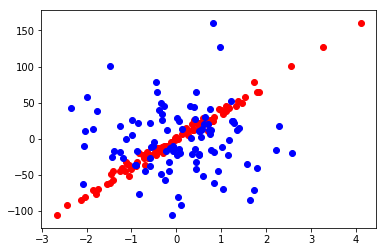

In [13]:
#pylab.scatter(map(lambda x:x[0], data), target, color = 'r')
#pylab.scatter(map(lambda x:x[1], data), target, color = 'b')
pylab.scatter([x[0] for x in data], target, color = 'r')
pylab.scatter([x[1] for x in data], target, color = 'b')

In [14]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                    test_size = 0.3)

#### LinearRegression

In [15]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [16]:
print(test_labels)

[-26.87743177  41.1068411  -76.75213382  10.33267887 -16.30914909
  58.26281761 -35.32062686  41.95683853 -84.32102748 -37.31870104
  24.47584129  29.8208999   45.05465366  64.19559505  49.41686419
  34.35183007 -40.84204295 -36.69728864 -45.27502383 -11.18242389
 -14.97110322  12.74038341  -1.42235396 -19.16792315 -21.47606913
 160.09441244 101.14760598 -63.4056294   21.20540389  64.70214251]


In [17]:
print(predictions)

[-27.64724188  36.15081629 -68.40085422   8.85401694 -12.17473662
  57.63254767 -41.90290612  44.02459137 -81.24406761 -34.58753703
  22.85400509  31.16247334  42.0441097   69.2974682   55.30578636
  38.82252167 -46.54202745 -26.88525132 -47.88571229 -12.69593586
 -12.57848046   7.7458615   -0.9853786  -11.70362636 -17.83271361
 155.53652808  96.29717882 -59.12049274  16.18658454  67.6220449 ]


In [18]:
metrics.mean_absolute_error(test_labels, predictions)

3.8804739951750338

In [29]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring='neg_mean_absolute_error', cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779695, std: 1.0737104492890204


In [27]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [28]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779695, std: 1.0737104492890204


In [30]:
coef

array([38.07925837,  0.        ])

In [31]:
linear_regressor.coef_

array([37.92413065,  0.06272355])

In [32]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.33357139340041186

In [33]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [34]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 37.92*x1 + 0.06*x2 + -0.33


#### Lasso

In [ ]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [ ]:
lasso_scoring = cross_validation.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print 'mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std())

In [ ]:
print lasso_regressor.coef_

In [ ]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

In [ ]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1])